Week 1: Intro to tech

In [5]:
import numpy as np
import uproot
import vector
import awkward
import matplotlib.pyplot as plt
import mplhep as hep

#directory = "/Users/archiebrooks/Documents/Uni/mphys project/"
directory = "c:/Users/matis/OneDrive/Documents/Y4/Project/"

hep.style.use('ATLAS')

Functions for plotting

In [6]:
def histogram(data, bins, data_label, axes, density=False, ratio=False, ratio_axes=None):
    if len(data[0]) != 1:
        global_min = min([np.min(d) for d in data])
        global_max = max([np.max(d) for d in data])

        bin_edges = np.linspace(global_min, global_max, bins+1)
        counts = []
        for i in range(len(data)):
            counts.append(np.histogram(data[i], bins=bin_edges, density=density)[0].astype(float))
    else:
        counts, bin_edges = np.histogram(data, bins=bins, density=density)

    hep.histplot(counts, bin_edges, ax=axes, label=data_label, histtype='step')

    if ratio:
        reference_counts = counts[0]
        for i in range(1, len(counts)):
            ratio_values = np.divide(counts[i], reference_counts, out=np.zeros_like(counts[i]), where=reference_counts != 0)
            hep.histplot(ratio_values, bin_edges, ax=ratio_axes, label=f'{data_label[i]}/{data_label[0]}')
        ratio_axes.set_ylabel("Ratio")
        ratio_axes.set_xlabel("Bin")
        ratio_axes.axhline(1, color='black', linestyle='--')  # Reference line at ratio=1
        ratio_axes.legend()

    hep.atlas.label(ax=axes)

Unpacking data 
1. Extracting 4 top data

In [7]:
tree4 = uproot.open(directory + 'MPHYS-4Top/4tops_partonic_skimmed_2409.root')['tree']
events = tree4.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

for data in tree4.iterate(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e']):

    top_pt = awkward.to_numpy(data['top_pt'])
    top_e = awkward.to_numpy(data['top_e'])
    top_eta = awkward.to_numpy(data['top_eta'])
    antitop_eta = awkward.to_numpy(data['anti_top_eta'])


    filtered_top_pt = top_pt[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_e = top_e[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_eta = top_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_antitop_eta = antitop_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]

2. Extracting 3 top data

In [8]:
tree3W = uproot.open(directory + 'MPHYS-4Top/3tops_tttW_partonic_skimmed_2609.root')['tree']
events3W = tree3W.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

mask_tttbarW = (awkward.num(events3W['top_pt']) == 2) & (awkward.num(events3W['anti_top_pt']) == 1)
mask_ttbartbarW = (awkward.num(events3W['top_pt']) == 1) & (awkward.num(events3W['anti_top_pt']) == 2)
tttbarW = events3W[mask_tttbarW]
ttbartbarW = events3W[mask_ttbartbarW]

tree3j = uproot.open(directory + 'MPHYS-4Top/3tops_tttj_partonic_skimmed_2609.root')['tree']
events3j = tree3j.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

mask_tttbarj = (awkward.num(events3j['top_pt']) == 2) & (awkward.num(events3j['anti_top_pt']) == 1)
mask_ttbartbarj = (awkward.num(events3j['top_pt']) == 1) & (awkward.num(events3j['anti_top_pt']) == 2)
tttbarj = events3j[mask_tttbarj]
ttbartbarj = events3j[mask_ttbartbarj]

3. Plotting Histograms

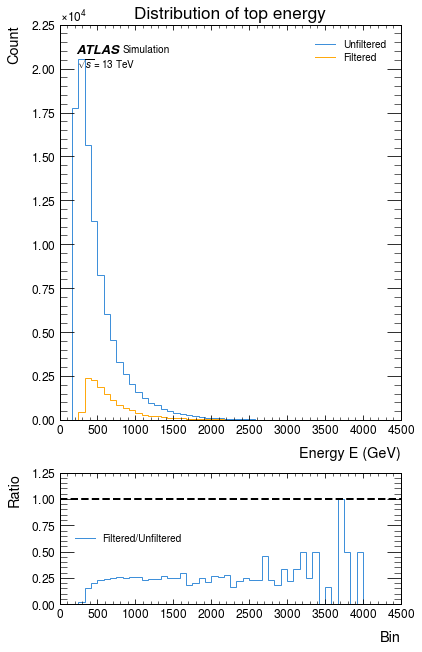

In [9]:
split_top_e = top_e.reshape(100000,1)
split_filtered_top_e = filtered_top_e.reshape(13634,1)

fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(6,10))
histogram([split_top_e, split_filtered_top_e], 50, ['Unfiltered','Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_title("Distribution of top energy")
ax[0].set_xlabel(r"Energy E (GeV)")
ax[0].set_ylabel("Count")
ax[0].legend()
plt.show()

In [10]:
split_antitop_eta = antitop_eta.reshape(100000,1)
split_filtered_antitop_eta = filtered_antitop_eta.reshape(13634,1)
split_top_eta = top_eta.reshape(100000,1)
split_filtered_top_eta = filtered_top_eta.reshape(13634,1)

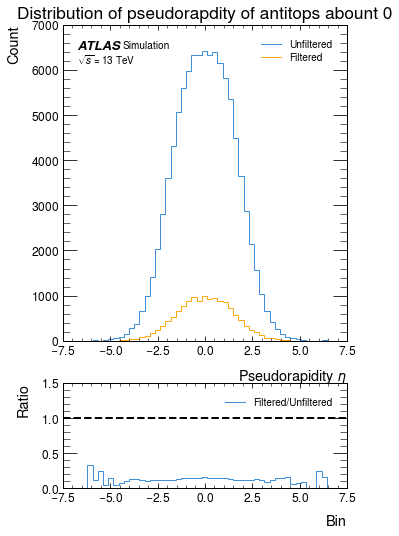

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(5,8))
histogram([split_antitop_eta,split_filtered_antitop_eta], 50, ['Unfiltered', 'Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_title("Distribution of pseudorapdity of antitops abount 0")
ax[0].set_xlabel(r"Pseudorapidity $\eta$")
ax[0].set_ylabel("Count")
ax[0].legend()
plt.show()

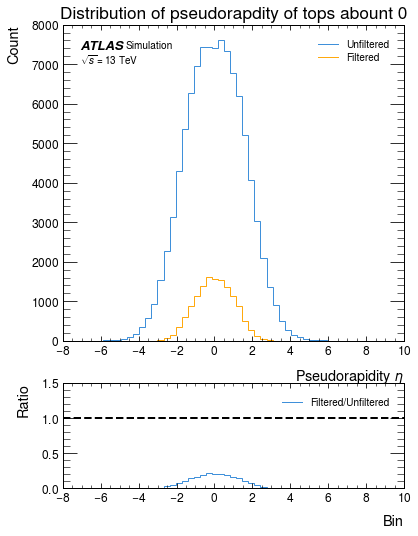

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(6,8))
histogram([split_top_eta,split_filtered_top_eta], 50, ['Unfiltered', 'Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_title("Distribution of pseudorapdity of tops abount 0")
ax[0].set_xlabel(r"Pseudorapidity $\eta$")
ax[0].set_ylabel("Count")
ax[0].legend()
plt.show()

Vectors
1. 4 top Masks/Filters

In [13]:
pt_mask_1 = events['top_pt'][:, 0] > 50
pt_mask_2 = events['top_pt'][:, 1] > 50

eta_mask_1 = (events['top_eta'][:, 0] > -2.4) & (data['top_eta'][:, 0] < 2.4)
eta_mask_2 = (events['top_eta'][:, 1] > -2.4) & (data['top_eta'][:, 1] < 2.4)

anti_pt_mask_1 = events['anti_top_pt'][:, 0] > 50
anti_pt_mask_2 = events['anti_top_pt'][:, 1] > 50

anti_eta_mask_1 = (events['anti_top_eta'][:, 0] > -2.4) & (data['anti_top_eta'][:, 0] < 2.4)
anti_eta_mask_2 = (events['anti_top_eta'][:, 1] > -2.4) & (data['anti_top_eta'][:, 1] < 2.4)

masks = pt_mask_1 & pt_mask_2 & eta_mask_1 & eta_mask_2 & anti_pt_mask_1 & anti_pt_mask_2 & anti_eta_mask_1 & anti_eta_mask_2

2. 3 top Masks/Filters

In [14]:
tttbarW_pt_mask_1 = tttbarW['top_pt'][:,0] > 50
tttbarW_pt_mask_2 = tttbarW['top_pt'][:,1] > 50
tttbarW_anti_pt_mask = tttbarW['anti_top_pt'][:,0] > 50

tttbarW_eta_mask_1 = (tttbarW['top_eta'][:, 0] > -2.4) & (tttbarW['top_eta'][:, 0] < 2.4)
tttbarW_eta_mask_2 = (tttbarW['top_eta'][:, 1] > -2.4) & (tttbarW['top_eta'][:, 1] < 2.4)
tttbarW_anti_eta_mask = (tttbarW['anti_top_eta'][:, 0] > -2.4) & (tttbarW['anti_top_eta'][:, 0] < 2.4)

tttbarW_masks = tttbarW_pt_mask_1 & tttbarW_pt_mask_2 & tttbarW_anti_pt_mask & tttbarW_eta_mask_1 & tttbarW_eta_mask_2 & tttbarW_anti_eta_mask

ttbartbarW_pt_mask = ttbartbarW['top_pt'][:,0] > 50
ttbartbarW_anti_pt_mask_1 = ttbartbarW['anti_top_pt'][:,0] > 50
ttbartbarW_anti_pt_mask_2 = ttbartbarW['anti_top_pt'][:,1] > 50

ttbartbarW_eta_mask = (ttbartbarW['top_eta'][:, 0] > -2.4) & (ttbartbarW['top_eta'][:, 0] < 2.4)
ttbartbarW_anti_eta_mask_1 = (ttbartbarW['anti_top_eta'][:, 0] > -2.4) & (ttbartbarW['anti_top_eta'][:, 0] < 2.4)
ttbartbarW_anti_eta_mask_2 = (ttbartbarW['anti_top_eta'][:, 1] > -2.4) & (ttbartbarW['anti_top_eta'][:, 1] < 2.4)

ttbartbarW_masks = ttbartbarW_pt_mask & ttbartbarW_anti_pt_mask_1 & ttbartbarW_anti_pt_mask_2 & ttbartbarW_eta_mask & ttbartbarW_anti_eta_mask_1 & ttbartbarW_anti_eta_mask_2

tttbarj_pt_mask_1 = tttbarj['top_pt'][:,0] > 50
tttbarj_pt_mask_2 = tttbarj['top_pt'][:,1] > 50
tttbarj_anti_pt_mask = tttbarj['anti_top_pt'][:,0] > 50

tttbarj_eta_mask_1 = (tttbarj['top_eta'][:, 0] > -2.4) & (tttbarj['top_eta'][:, 0] < 2.4)
tttbarj_eta_mask_2 = (tttbarj['top_eta'][:, 1] > -2.4) & (tttbarj['top_eta'][:, 1] < 2.4)
tttbarj_anti_eta_mask = (tttbarj['anti_top_eta'][:, 0] > -2.4) & (tttbarj['anti_top_eta'][:, 0] < 2.4)

tttbarj_masks = tttbarj_pt_mask_1 & tttbarj_pt_mask_2 & tttbarj_anti_pt_mask & tttbarj_eta_mask_1 & tttbarj_eta_mask_2 & tttbarj_anti_eta_mask

ttbartbarj_pt_mask = ttbartbarj['top_pt'][:,0] > 50
ttbartbarj_anti_pt_mask_1 = ttbartbarj['anti_top_pt'][:,0] > 50
ttbartbarj_anti_pt_mask_2 = ttbartbarj['anti_top_pt'][:,1] > 50

ttbartbarj_eta_mask = (ttbartbarj['top_eta'][:, 0] > -2.4) & (ttbartbarj['top_eta'][:, 0] < 2.4)
ttbartbarj_anti_eta_mask_1 = (ttbartbarj['anti_top_eta'][:, 0] > -2.4) & (ttbartbarj['anti_top_eta'][:, 0] < 2.4)
ttbartbarj_anti_eta_mask_2 = (ttbartbarj['anti_top_eta'][:, 1] > -2.4) & (ttbartbarj['anti_top_eta'][:, 1] < 2.4)

ttbartbarj_masks = ttbartbarj_pt_mask & ttbartbarj_anti_pt_mask_1 & ttbartbarj_anti_pt_mask_2 & ttbartbarj_eta_mask & ttbartbarj_anti_eta_mask_1 & ttbartbarj_anti_eta_mask_2

2. Top AntiTop individual awkward vecors

In [15]:
tops = vector.zip({'pt':events['top_pt'],'eta':events['top_eta'],'phi':events['top_phi'], 'mass':172.76})
anti_tops = vector.zip({'pt':events['anti_top_pt'],'eta':events['anti_top_eta'],'phi':events['anti_top_phi'], 'mass':172.76})

filtered_tops= tops[masks]
filtered_anti_tops = anti_tops[masks]

3.1 4top events seperated into individual top channels + filtered

In [16]:
top1 = vector.zip({'pt':events['top_pt'][:,0],'eta':events['top_eta'][:,0],'phi':events['top_phi'][:,0], 'mass':172.76})
top2 = vector.zip({'pt':events['top_pt'][:,1],'eta':events['top_eta'][:,1],'phi':events['top_phi'][:,1], 'mass':172.76})
anti_top1 = vector.zip({'pt':events['anti_top_pt'][:,0],'eta':events['anti_top_eta'][:,0],'phi':events['anti_top_phi'][:,0], 'mass':172.76})
anti_top2 = vector.zip({'pt':events['anti_top_pt'][:,1],'eta':events['anti_top_eta'][:,1],'phi':events['anti_top_phi'][:,1], 'mass':172.76})

filtered_top1 = top1[masks]
filtered_top2 = top2[masks]
filtered_anti_top1 = anti_top1[masks]
filtered_anti_top2 = anti_top2[masks]

four_tops = top1+top2+anti_top1+anti_top2
filtered_4_tops = filtered_top1+filtered_top2+filtered_anti_top1+filtered_anti_top2
filtered_4_tops = filtered_4_tops[filtered_4_tops.mass > 1500]

flatten the data set?

In [17]:
print(top1.rho)
print(top2.rho)
print(anti_top1.rho)
print(anti_top2.rho)


[99.3, 82.9, 96, 77.9, 330, 111, 157, ..., 164, 299, 9.79, 8.35, 184, 156, 117]
[85.6, 307, 672, 203, 268, 81.5, 12.8, ..., 90.1, 140, 114, 187, 176, 317, 104]
[116, 231, 761, 100, 21.2, 93.4, 19.4, ..., 247, 231, 190, 283, 358, 125, 146]
[214, 182, 136, 198, 92.1, 248, 160, ..., 367, 218, 199, 109, 505, 296, 149]


3.2a Extracting deltaR values for highest and second highest pt unfiltered tops

In [94]:
all_4tops = awkward.concatenate([awkward.Array([top1]),awkward.Array([top2]),awkward.Array([anti_top1]),awkward.Array([anti_top2])], axis=0)
print(all_4tops)

[[{rho: 99.3, phi: 1.58, eta: -1.08, tau: 173}, ..., {rho: 117, ...}], ...]


In [108]:
print(all_4tops.rho)
transposed_4tops = np.transpose(all_4tops)
print(transposed_4tops.rho)
sorted_indices = np.argsort(transposed_4tops.rho)
print(sorted_indices)
trans_sorted_4tops = transposed_4tops[sorted_indices]
print(trans_sorted_4tops.rho)
print(np.shape(trans_sorted_4tops.rho))

[[99.3, 82.9, 96, 77.9, 330, 111, ..., 299, 9.79, 8.35, 184, 156, 117], ...]
[[99.3, 85.6, 116, 214], [82.9, 307, 231, 182], ..., [117, 104, 146, 149]]
[[1, 0, 2, 3], [0, 3, 2, 1], [0, 3, 1, 2], ..., [2, 0, 3, 1], [1, 0, 2, 3]]
[[85.6, 99.3, 116, 214], [82.9, 182, 231, 307], ..., [104, 117, 146, 149]]
[50000, 4]


In [111]:
sorted_4tops = np.transpose(trans_sorted_4tops[:,2])
print(sorted_4tops[1])

{rho: 231, phi: 1.82, eta: 0.892, tau: 173}


In [22]:
pts = awkward.Array([top1.pt, top2.pt, anti_top1.pt, anti_top2.pt])

sorted_pts = awkward.sort(pts, axis=0, ascending=False)

max_pts = sorted_pts[0,:]
second_max_pts = sorted_pts[1,:]

deltaRs = []
for i in range(len(top1)):
    if max_pts[i] == top1[i].pt:
        if second_max_pts[i] == top2[i].pt:
            deltaRs.append(top1[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(top1[i].deltaR(anti_top1[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(top1[i].deltaR(anti_top2[i]))
    
    elif max_pts[i] == top2[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(top2[i].deltaR(top1[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(top2[i].deltaR(anti_top1[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(top2[i].deltaR(anti_top2[i]))

    elif max_pts[i] == anti_top1[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(anti_top1[i].deltaR(top1[i]))
        elif second_max_pts[i] == top2[i].pt:
            deltaRs.append(anti_top1[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(anti_top1[i].deltaR(anti_top2)[i])

    elif max_pts[i] == anti_top2[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(anti_top2[i].deltaR(top1[i]))
        elif second_max_pts[i] == top2[i].pt:
            deltaRs.append(anti_top2[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(anti_top2[i].deltaR(anti_top1[i]))


3.2b Extracting DeltaR values for highest and second highest pt filtered tops

In [23]:
filtered_pts = awkward.Array([filtered_top1.pt, filtered_top2.pt, filtered_anti_top1.pt, filtered_anti_top2.pt])

filtered_sorted_pts = awkward.sort(filtered_pts, axis=0, ascending=False)

filtered_max_pts = filtered_sorted_pts[0,:]
filtered_second_max_pts = filtered_sorted_pts[1,:]

filtered_deltaRs = []
for i in range(len(filtered_top1)):
    if filtered_max_pts[i] == filtered_top1[i].pt:
        if filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_anti_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_anti_top2[i]))
    
    elif filtered_max_pts[i] == filtered_top2[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_anti_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_anti_top2[i]))

    elif filtered_max_pts[i] == filtered_anti_top1[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_anti_top2)[i])

    elif filtered_max_pts[i] == filtered_anti_top2[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_anti_top1[i]))

4. Plotting Histograms for invariant mass distributions and DeltaR values

In [24]:
print(np.array(four_tops.mass))

[1093.09926109 1461.53489903 2277.57724473 ... 1845.63986085 1315.36827571
  938.86707413]


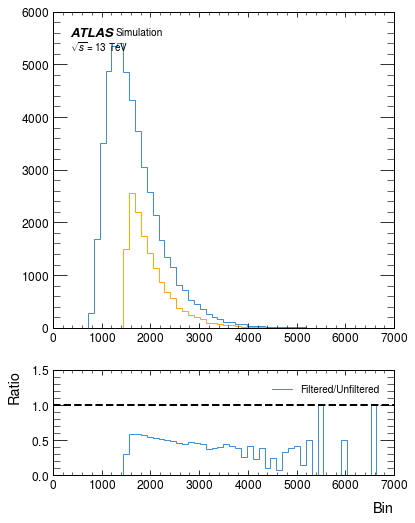

In [25]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([np.array(four_tops.mass),np.array(filtered_4_tops.mass)], 50, ['Unfiltered', 'Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
plt.show()

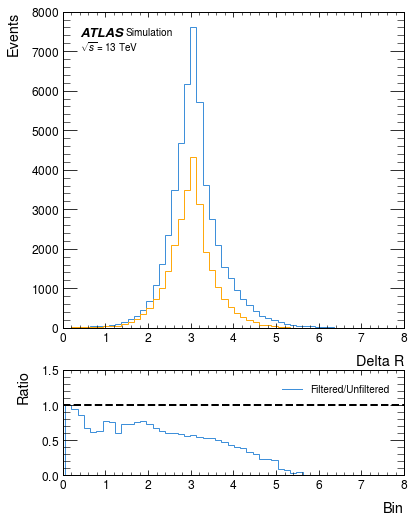

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, gridspec_kw={'height_ratios': [3, 1]},figsize = (6,8))
histogram([deltaRs,filtered_deltaRs], 50, ['Unfiltered', 'Filtered'], ax[0], ratio=True, ratio_axes=ax[1])
ax[0].set_xlabel('Delta R')
ax[0].set_ylabel('Events')
plt.show()

Same bin edges vs different bin edges

In [27]:
split_top_e = top_e.reshape(100000,1)
split_filtered_top_e = filtered_top_e.reshape(87274,1)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
histogram([split_top_e, split_filtered_top_e], 50, 'Unfiltered', ax[0])
ax[0].set_title("Distribution of top energy")
ax[0].set_xlabel(r"Energy E (GeV)")
ax[0].set_ylabel("Count")
ax[0].legend()

histogram(split_top_e, 50, 'Unfiltered', ax[1])
histogram(split_filtered_top_e, 50, 'Unfiltered', ax[1])
ax[1].set_title("Distribution of top energy")
ax[1].set_xlabel(r"Energy E (GeV)")
ax[1].set_ylabel("Count")
ax[1].legend()
plt.show()

ValueError: cannot reshape array of size 13634 into shape (87274,1)

In [ ]:
def histogram(data, bins, data_label, axes, density=False):
    if len(data[0]) != 1:
        global_min = min([np.min(d) for d in data])
        global_max = max([np.max(d) for d in data])

        bin_edges = np.linspace(global_min, global_max, bins+1)
        counts = []
        for i in range(len(data)):
            counts.append(np.histogram(data[i], bins=bin_edges, density=density)[0])
    else:
        counts, bin_edges = np.histogram(data, bins=bins, density=density)
    hep.histplot(counts, bin_edges, ax=axes, label=data_label, histtype='step')
    hep.atlas.label(ax=axes)